In [24]:
# Import required libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
import plotly.offline as pyo
import plotly.graph_objs as go
import re as re
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


 ## <a id='1'>1. importing loans raw data and knowing the shape</a>

In [25]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

raw_data = pd.read_csv(".\loan.csv")

display(raw_data)

C:\Users\sadhn\AppData\Local\Temp\ipykernel_34536\3895247460.py:4: DtypeWarning:

Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [26]:
print ("No. of rows     : " ,raw_data.shape[0])
print ("No. of Columns  : " ,raw_data.shape[1])

No. of rows     :  39717
No. of Columns  :  111


 ## <a id='1'>Identifying null columns and remove them</a>
info() method shows the data types of all columns and  also gives the counts of non null values. In Non-Null vlaues is 0 then that colum is not useful for us hence we remove them

In [27]:
raw_data.info(verbose=True,  show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [28]:
raw_data.dropna( axis='columns',how='all',inplace=True) #if inpace  is true then original dataset is modified 
raw_data.info(verbose=True,  show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

 ## <a id='1'>Identifying columns with null values less than 75% of the total records and dropping them</a>

In [29]:
print(raw_data.columns[raw_data.isnull().mean() > 0.75])
raw_data.drop(raw_data.columns[raw_data.isnull().mean() > 0.75],axis='columns',inplace=True)
raw_data.info(verbose=True,  show_counts=True)

Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership        

In [30]:
raw_data.isnull().mean()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.061913
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
desc                          0.325805
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs              

# Behavioural Columns
These columns will be filled after application is filled or after he/she starts paying the emis. We dont need these columns

In [31]:
behavioural_columns = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','collections_12_mths_ex_med','mths_since_last_delinq']
Cleansed_Data = raw_data.drop(behavioural_columns,axis='columns',inplace=False)

In [32]:
Cleansed_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

# Ignore columns which has only one value.
there may be change of values which have Null and also any one value. So we list the columns which have less than or equal to two unique values. We see that "term" column has two valid unique values. Hence we dont drop that column. Rest of the columns will be dropped

In [33]:
one_uniq_val_col = []
for c in Cleansed_Data.columns:
    unique_values = Cleansed_Data[c].unique()
    count_unique_values = Cleansed_Data[c].nunique()
    if (  count_unique_values <= 2 ) :
        one_uniq_val_col.append(c)
        print("Col_name  : " + c + " : Unique value counts = " + str(count_unique_values))
        print(unique_values)

Col_name  : term : Unique value counts = 2
[' 36 months' ' 60 months']
Col_name  : pymnt_plan : Unique value counts = 1
['n']
Col_name  : initial_list_status : Unique value counts = 1
['f']
Col_name  : policy_code : Unique value counts = 1
[1]
Col_name  : application_type : Unique value counts = 1
['INDIVIDUAL']
Col_name  : tax_liens : Unique value counts = 1
[ 0. nan]


In [34]:
one_uniq_val_col.pop(one_uniq_val_col.index('term'))
print(one_uniq_val_col)

['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'tax_liens']


In [35]:
Cleansed_Data.drop(one_uniq_val_col,axis='columns',inplace=True)

In [36]:
Cleansed_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_length            38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

# Understanding columns of type object
By looking in to uniqie values we can understand what kind of data a indiviual column is having

In [37]:
print(Cleansed_Data['term'].unique()) #from this column we have to remove months.
print( Cleansed_Data['term'].apply(lambda x : str(x).split()[0]).value_counts())
Cleansed_Data['term'] = Cleansed_Data['term'].apply(lambda x : str(x).split()[0])
print(Cleansed_Data['term'].unique())

[' 36 months' ' 60 months']
36    29096
60    10621
Name: term, dtype: int64
['36' '60']


In [38]:
print(Cleansed_Data['int_rate'].unique()) #this coulum should be converted into float


['10.65%' '15.27%' '15.96%' '13.49%' '12.69%' '7.90%' '18.64%' '21.28%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '22.06%' '20.89%' '20.30%' '23.91%' '19.03%' '23.52%' '23.13%'
 '22.74%' '22.35%' '24.11%' '6.00%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '8.49%' '15.99%' '16.49%' '6.99%'
 '12.99%' '15.23%' '14.79%' '5.42%' '10.59%' '17.49%' '15.62%' '21.36%'
 '19.29%' '13.99%' '18.39%' '16.89%' '17.99%' '20.62%' '20.99%' '22.85%'
 '19.69%' '20.25%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '13.84%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%'
 '21.82%' '19.79%' '18.49%' '22.94%' '24.59%' '24.40%' '21.48%' '14.82%'
 '14.17%' '7.29%' '17.88%' '20.11%' '16.02%' '17.51%' '13.43%' '14.91%'
 '13.06%' '15.28%' '15.65%' '17.14%' '11.11%' '10.37%' '16.40%' '7.6

In [39]:
Cleansed_Data['int_rate'] = Cleansed_Data['int_rate'].apply(lambda x : float(str(x).split('%')[0]))
print(Cleansed_Data['int_rate'].unique())

[10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 13.84 16.59
 17.19 12.87 20.69  9.67 21.82 19.79 18.49 22.94 24.59 24.4  21.48 14.82
 14.17  7.29 17.88 20.11 16.02 17.51 13.43 14.91 13.06 15.28 15.65 17.14
 11.11 10.37 16.4   7.66 10.   18.62 10.74  5.79  6.92  9.63 14.54 12.68
 19.36 13.8  18.99 21.59 20.85 21.22 19.74 20.48  6.91 12.23 12.61 10.36
  6.17  6.54  9.25 16.69 15.95  8.88 13.35  9.62 16.32 12.98 14.83 13.72
 14.09 14.46 20.03 17.8  15.2  15.57 18.54 19.66 17.06 18.17 17.43 20.4
 20.77 18.91 21.14 17.44 13.23  7.88 11.12 13.61 10.38

In [40]:
print(Cleansed_Data['grade'].unique()) #data looks good.


['B' 'C' 'A' 'E' 'F' 'D' 'G']


In [41]:
print(Cleansed_Data['sub_grade'].unique()) #data looks good.


['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']


In [42]:
print(Cleansed_Data['emp_title'].unique(),Cleansed_Data['emp_title'].nunique()) #many unique values, many not be useful
Cleansed_Data.drop('emp_title',axis='columns',inplace=True)

[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center'] 28820


In [43]:
print(Cleansed_Data['emp_length'].unique(),Cleansed_Data['emp_length'].nunique())  #this coulum should be converted into int

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan] 11


In [44]:
 #>3 is for nan (null) values
Cleansed_Data.emp_length = test = Cleansed_Data.emp_length.apply(lambda x:  re.sub('[a-z,\ \+ \<]', '', str(x)) if len(str(x))>3 else 0)
print(Cleansed_Data.emp_length.value_counts())

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64


In [45]:
print(Cleansed_Data['home_ownership'].unique(),Cleansed_Data['home_ownership'].nunique())  #data looks good.

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE'] 5


In [46]:
print(Cleansed_Data['verification_status'].unique(),Cleansed_Data['verification_status'].nunique())  #data looks good.

['Verified' 'Source Verified' 'Not Verified'] 3


In [47]:
print(Cleansed_Data['issue_d'].unique(),Cleansed_Data['issue_d'].nunique())  #data looks good but we need to change it date
Cleansed_Data.issue_d = Cleansed_Data.issue_d.apply(lambda x: dt.strptime(str(x), '%b-%y'))

['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07' 'Sep-07' 'Aug-07' 'Jul-07' 'Jun-07'] 55


In [48]:


#We can derive Year and Month from the the date. This are called derived columns
Cleansed_Data['Year'] = Cleansed_Data.issue_d.apply(lambda x: x.year)
Cleansed_Data['Month'] = Cleansed_Data.issue_d.apply(lambda x: x.month)

display(Cleansed_Data)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies,Year,Month
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,2011,12
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,2011,12
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,2011,12
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,2011,12
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,2011-12-01,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,NaN,2007,7
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,NaN,2007,7
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,1,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,NaN,2007,7
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,1,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,NaN,2007,7


In [49]:
print(Cleansed_Data['loan_status'].unique(),Cleansed_Data['loan_status'].nunique())  #data looks good 
#but we dont want records with Current as loan_status because they wont help us in determining if that customer 
#is will default or not.


['Fully Paid' 'Charged Off' 'Current'] 3


In [50]:
Cleansed_Data = Cleansed_Data[Cleansed_Data['loan_status'] != 'Current'] #filtering out loan_Staus is Current

In [51]:
#for ploting we can mark the fully paid as 1 or not paid as zero. Derviving a new column has_paid
Cleansed_Data["has_paid"] = Cleansed_Data["loan_status"].apply(lambda x: 1 if x == "Fully Paid" else 0)
Cleansed_Data['has_paid'].value_counts()

1    32950
0     5627
Name: has_paid, dtype: int64

In [52]:
print(Cleansed_Data['url'].unique(),Cleansed_Data['url'].nunique())  #url just have website and id column in the end. so we dont need this
Cleansed_Data.drop(['url'],axis='columns',inplace=True)

['https://lendingclub.com/browse/loanDetail.action?loan_id=1077501'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=1077430'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=1077175' ...
 'https://lendingclub.com/browse/loanDetail.action?loan_id=90395'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=90376'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=87023'] 38577


In [53]:
print(Cleansed_Data['desc'].unique(),Cleansed_Data['desc'].nunique())  #lot of text and many unique values. Droping this col
Cleansed_Data.drop(['desc'],axis='columns',inplace=True)

['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>'
 '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>'
 nan ...
 'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.'
 'The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing to pay them is patently bad financ

In [54]:
print(Cleansed_Data['purpose'].unique(),Cleansed_Data['purpose'].nunique())  #data looks good


['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational'] 14


In [55]:
print(Cleansed_Data['title'].value_counts())   #lot of unique values. Droping this col
Cleansed_Data.drop(['title'],axis='columns',inplace=True)

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64


In [56]:
print(Cleansed_Data['zip_code'].value_counts())   #lot of unique values. Droping this col
Cleansed_Data.drop(['zip_code'],axis='columns',inplace=True)

100xx    583
945xx    531
112xx    502
606xx    493
070xx    455
        ... 
463xx      1
381xx      1
592xx      1
414xx      1
469xx      1
Name: zip_code, Length: 822, dtype: int64


In [57]:
print(Cleansed_Data['addr_state'].value_counts(),Cleansed_Data['addr_state'].nunique())  #state code and data looks good. 
#this can be used as geography

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64 50


In [58]:
display(Cleansed_Data)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,Year,Month,has_paid
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12,1
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,2011,12,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12,1
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12,1
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0,2011,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,CO,11.33,NaN,2007,7,1
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,NC,6.40,NaN,2007,7,1
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,1,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.30,NaN,2007,7,1
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,1,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,MD,3.72,NaN,2007,7,1


# all data cleansing, data type conversion, null values removal and dervied columns creation comleted


# we proceed on to look into invalid data
1. funded_amnt > loan_amnt :  If this expression returns true this means funded_amnt is higher. Loan approved cant be more than requestexd. hence we can remove this data.
2. In the same way funded_amnt_inv <= funded_amnt : should be true all the time.

In [59]:
eda_data = Cleansed_Data
eda_data = eda_data[ ~(eda_data['funded_amnt'] > eda_data['loan_amnt']) ]

In [60]:
eda_data.shape #this means all data is valid

(38577, 23)

In [61]:
eda_data = eda_data[ eda_data['funded_amnt_inv'] <= eda_data['funded_amnt']]
eda_data.shape
#display(eda_data)

(38577, 23)

with above analysis we found out that there is no invalid data.

In [62]:
eda_data.columns
# Target Variable - Loan Status,has_paid
# Categorical Variables (dimensions) - term, grade, sub_grade, emp_length, home_ownership, verification_status, loan_status, purpose, addr_state,pub_rec_bankruptcies,Year, Month  
# Contineous Variables - 'loan_amnt', 'funded_amnt', 'funded_amnt_inv','int_rate','installment','dti','annual_inc'
eda_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,6.877797e+04,13.272727
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,6.421868e+04,6.673044
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,8.130000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,13.370000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,18.560000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000


# Identification and removal of outliers
<img src='.\images\box_plot_outliers.png' width="800" height="800">

<AxesSubplot:ylabel='loan_amnt'>

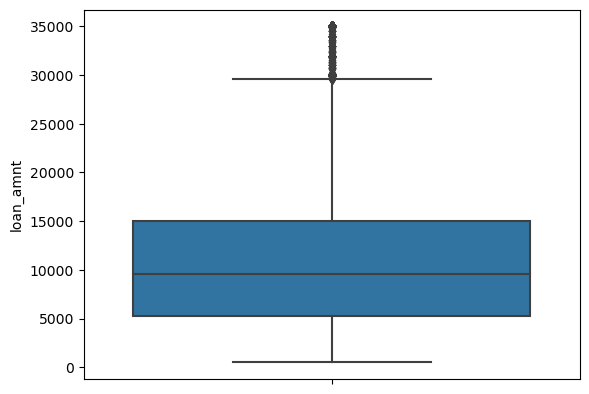

In [63]:
sns.boxplot(y=eda_data['loan_amnt']) #box plot indicates that date above 30000 is a outlier

<AxesSubplot:ylabel='funded_amnt'>

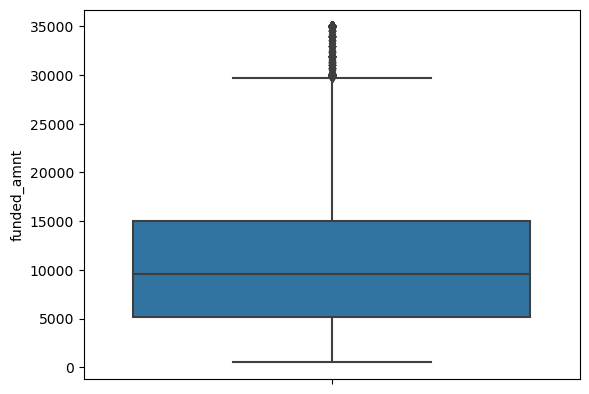

In [64]:
sns.boxplot(y=eda_data['funded_amnt']) #box plot indicates that date above 30000 is a outlier

<AxesSubplot:ylabel='funded_amnt_inv'>

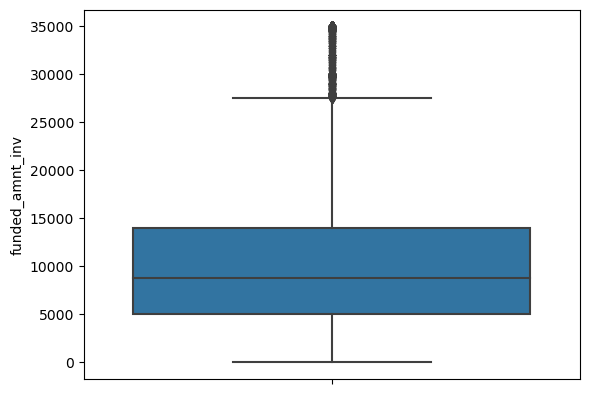

In [65]:
sns.boxplot(y=eda_data['funded_amnt_inv']) #box plot indicates that date above 28000 is a outlier

# Removing the outlier for loan amount , funded amount and funded_amnt_inv collumns




In [66]:
eda_data = eda_data[eda_data['loan_amnt'] < 30000]
eda_data = eda_data[eda_data['funded_amnt'] < 30000]
eda_data = eda_data[eda_data['funded_amnt_inv'] < 28000]

eda_data.shape

(37414, 23)

<AxesSubplot:ylabel='int_rate'>

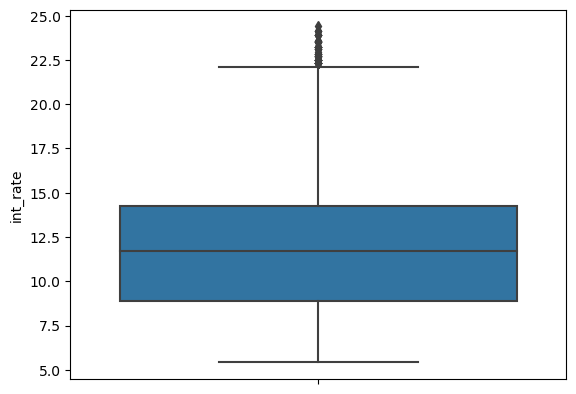

In [67]:
#'int_rate','installment','dti','annual_inc'
sns.boxplot(y=eda_data['int_rate']) #box plot indicates that date above 28000 is a outlier

In [68]:
print(eda_data[eda_data['int_rate'] > 22.5].shape) # 41 rows are outliers and variance it is 10%

(41, 23)


<AxesSubplot:ylabel='installment'>

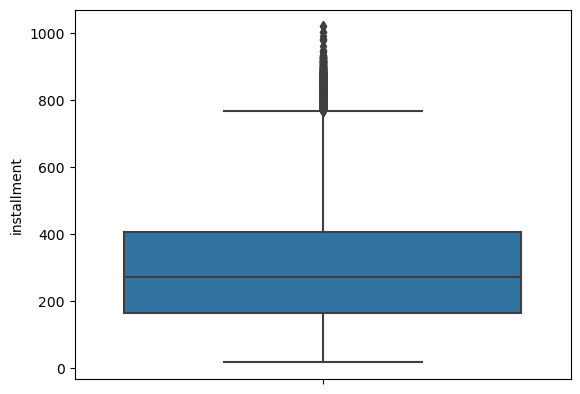

In [69]:
sns.boxplot(y=eda_data['installment']) #box plot indicates that date above 800 is a outlier

In [70]:
print(eda_data[eda_data['installment'] > 800].shape) # box plot indicates that date above 800 is a outlier and there are 885 records. So i am deciding to remove them as 20% varaiance

(885, 23)


In [71]:
eda_data = eda_data[eda_data['installment'] <= 800]


<AxesSubplot:ylabel='dti'>

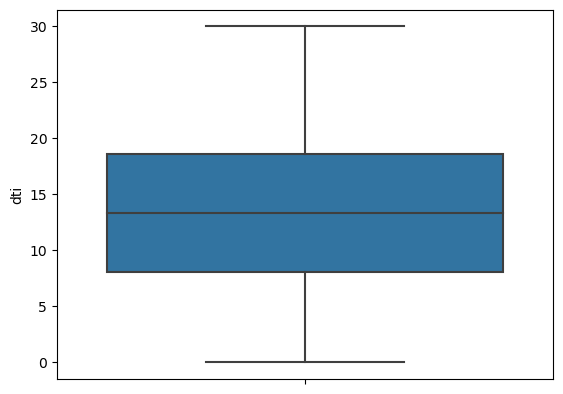

In [72]:
sns.boxplot(y=eda_data['dti']) #box plot for dti looks clean.

<AxesSubplot:ylabel='annual_inc'>

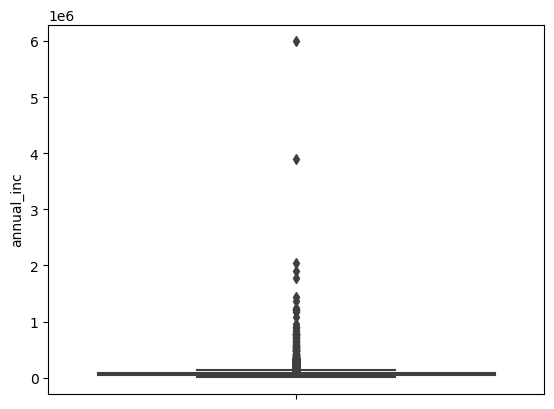

In [73]:
sns.boxplot(y=eda_data['annual_inc']) #box plot for dti looks clean.Y axis scale is in lakhs. filtering <300000 as there
#is huge difference

In [74]:
eda_data = eda_data[eda_data['annual_inc'] <= 300000]


In [77]:
uni_var_analysis = eda_data

In [78]:
uni_var_analysis.shape

(36410, 23)

# Univariate analysis

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

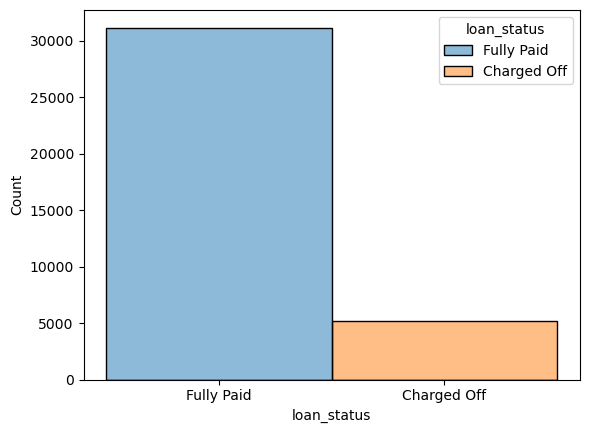

In [79]:
 sns.histplot(data=uni_var_analysis, x='loan_status', hue="loan_status", bins=2) # This is statistical data hence using hist plot

### Above histogram shows that only <15% given loans are Charged off

In [80]:
#Selecting records which have defaults into uni_var_analysis_defaults
#Selecting records which are fully paid into uni_var_analysis_paid

uni_var_analysis_defaults = uni_var_analysis[uni_var_analysis['has_paid']==0]
uni_var_analysis_paid = uni_var_analysis[uni_var_analysis['has_paid']==1]
#display(uni_var_analysis_defaults)

In [81]:
def barplot(uni_var_analysis_defaults, x, y):
    sns.countplot(data=uni_var_analysis_defaults, x=x, hue=x)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [82]:
#There  are so many unique values, hence we need to bucket this column for better understanding and optimal peroformance and 
def loan_amount_binning(amt):
    if amt < 5000:
        return 'low'
    elif amt >=5000 and amt < 15000:
        return 'medium'
    elif amt >= 15000 and amt < 25000:
        return 'high'
    else:
        return 'very high'
    
uni_var_analysis['loan_amnt_bucket'] = uni_var_analysis.loan_amnt.apply(lambda x : loan_amount_binning(x))
uni_var_analysis_defaults['loan_amnt_bucket'] = uni_var_analysis_defaults.loan_amnt.apply(lambda x : loan_amount_binning(x))
uni_var_analysis_paid['loan_amnt_bucket'] = uni_var_analysis_paid.loan_amnt.apply(lambda x : loan_amount_binning(x))


C:\Users\sadhn\AppData\Local\Temp\ipykernel_34536\3023854917.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sadhn\AppData\Local\Temp\ipykernel_34536\3023854917.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
display(uni_var_analysis_paid)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,Year,Month,has_paid,loan_amnt_bucket
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12,1,medium
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12,1,low
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12,1,medium
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0,2011,12,1,medium
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0.0,2011,12,1,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,CO,11.33,NaN,2007,7,1,low
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,NC,6.40,NaN,2007,7,1,medium
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,1,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.30,NaN,2007,7,1,medium
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,1,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,MD,3.72,NaN,2007,7,1,medium


In [84]:
display(uni_var_analysis_defaults)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,Year,Month,has_paid,loan_amnt_bucket
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,2011,12,0,low
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,CA,5.55,0.0,2011,12,0,medium
9,1071570,1306721,5375,5375,5350.0,60,12.69,121.45,B,B5,1,RENT,15000.0,Verified,2011-12-01,Charged Off,other,TX,18.08,0.0,2011,12,0,medium
12,1064687,1298717,9000,9000,9000.0,36,13.49,305.38,C,C1,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,debt_consolidation,VA,10.08,0.0,2011,12,0,medium
14,1069057,1303503,10000,10000,10000.0,36,10.65,325.74,B,B2,3,RENT,100000.0,Source Verified,2011-12-01,Charged Off,other,CA,7.06,0.0,2011,12,0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,118823,118026,2500,2500,675.0,36,12.80,84.00,D,D4,1,MORTGAGE,32000.0,Not Verified,2007-08-01,Charged Off,home_improvement,NE,20.00,NaN,2007,8,0,low
39668,118533,117783,2500,2500,825.0,36,9.64,80.26,B,B4,1,MORTGAGE,75000.0,Not Verified,2007-08-01,Charged Off,home_improvement,NE,20.00,NaN,2007,8,0,low
39669,118523,118519,6500,6500,225.0,36,15.01,225.37,F,F1,9,MORTGAGE,213000.0,Not Verified,2007-08-01,Charged Off,small_business,GA,6.45,NaN,2007,8,0,medium
39678,113179,113093,1000,1000,950.0,36,10.59,32.55,C,C2,2,MORTGAGE,33990.0,Not Verified,2007-08-01,Charged Off,wedding,VA,14.47,NaN,2007,8,0,low


### It is observed that most of them are repaying the loans, defauls 5225  and fully paid 31185  records.

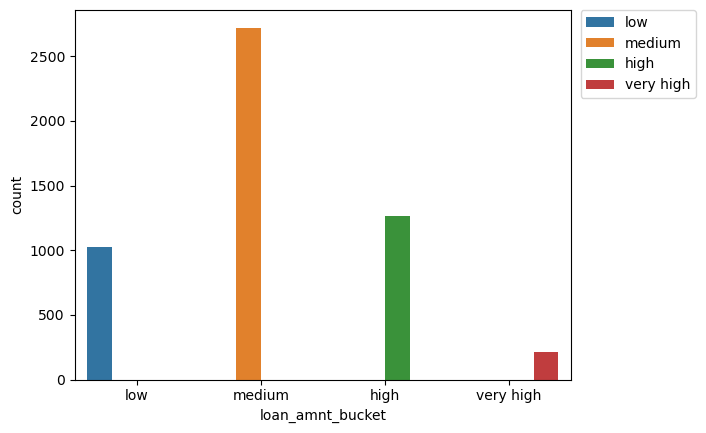

In [85]:
barplot(uni_var_analysis_defaults, 'loan_amnt_bucket', 'has_paid')


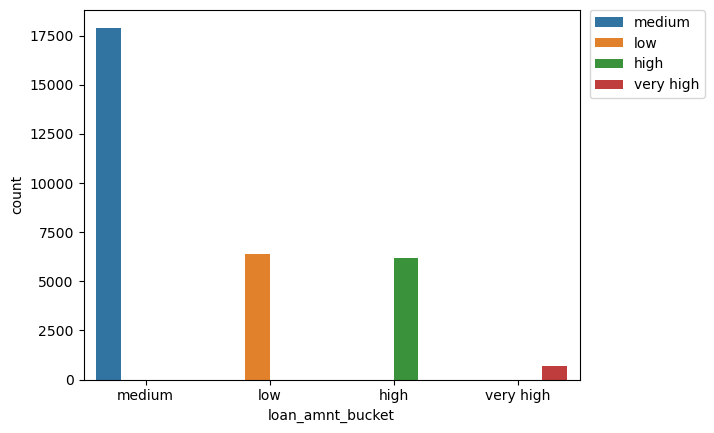

In [86]:
barplot(uni_var_analysis_paid, 'loan_amnt_bucket', 'has_paid')


### Observation from above plots is that Higher loan_amount are likely to be charged off. Low and Medium loan amounts are likely to be fully paid off

term  has_paid
36    1           24738
60    1            6447
36    0            3059
60    0            2166
dtype: int64

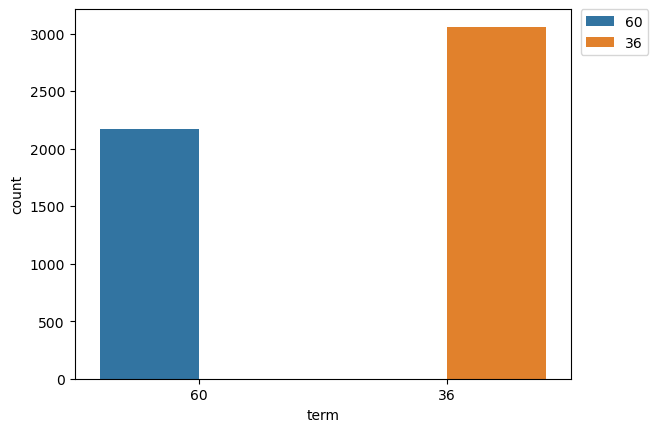

In [87]:
barplot(uni_var_analysis_defaults, 'term', 'has_paid')
uni_var_analysis[['term', 'has_paid']].value_counts()

term  has_paid
36    1           24738
60    1            6447
36    0            3059
60    0            2166
dtype: int64

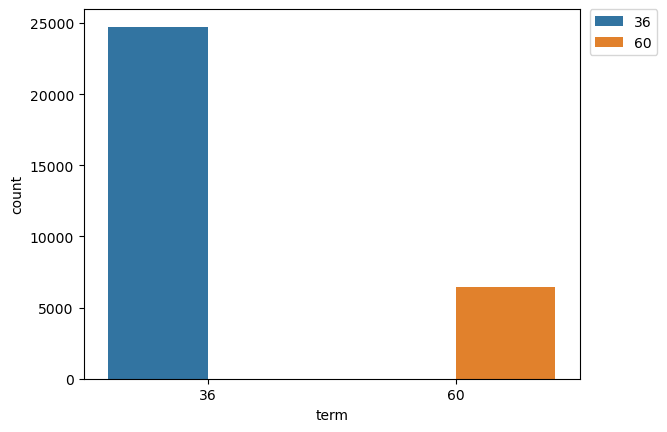

In [88]:
barplot(uni_var_analysis_paid, 'term', 'has_paid')
uni_var_analysis[['term', 'has_paid']].value_counts()

### Observation 60 months tenure has high default rates. Almost 35% of the 60 month tenure loans are defaulted

In [89]:
display(uni_var_analysis_paid)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,Year,Month,has_paid,loan_amnt_bucket
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12,1,medium
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12,1,low
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12,1,medium
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0,2011,12,1,medium
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0.0,2011,12,1,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,CO,11.33,NaN,2007,7,1,low
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,NC,6.40,NaN,2007,7,1,medium
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,1,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.30,NaN,2007,7,1,medium
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,1,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,MD,3.72,NaN,2007,7,1,medium


### Analyzing Installment data


In [90]:
def installments_bucketing(amount):
    if amount <= 160:
        return 'low'
    elif amount > 160 and amount <=390:
        return 'medium'
    elif amount > 390 and amount <=720:
        return 'high'
    else:
        return 'very high'

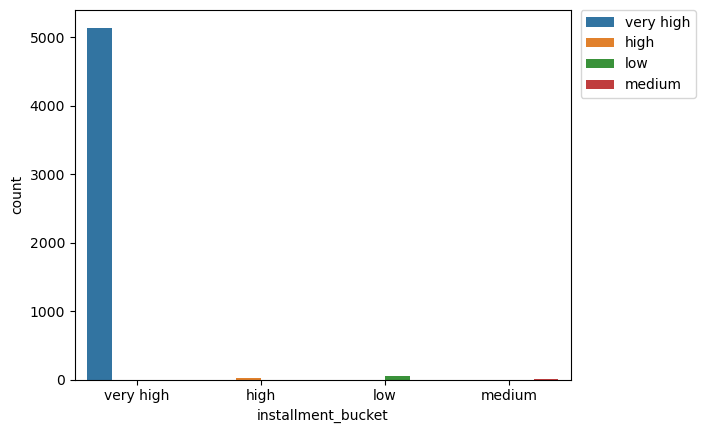

In [91]:

uni_var_analysis['installment_bucket'] = uni_var_analysis.funded_amnt_inv.apply(lambda x : installments_bucketing(x))
uni_var_analysis_defaults = uni_var_analysis[uni_var_analysis['has_paid']==0] 
uni_var_analysis_paid = uni_var_analysis[uni_var_analysis['has_paid']==1] 

barplot(uni_var_analysis_defaults, 'installment_bucket', 'has_paid')

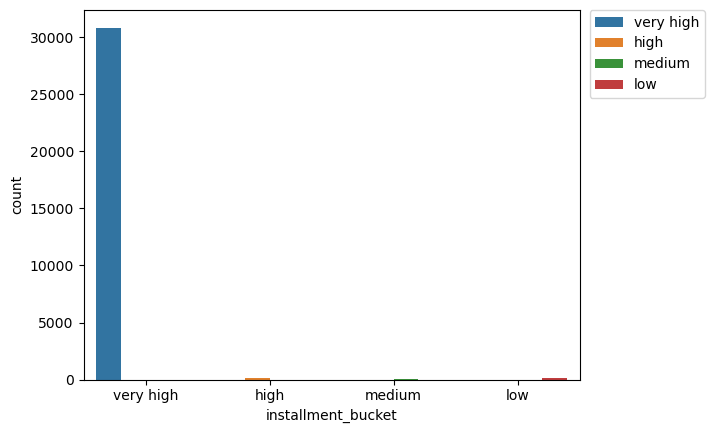

In [92]:
barplot(uni_var_analysis_paid, 'installment_bucket', 'has_paid')


### Higher number of installments , higher the risk of default

### Analyzing Interest Rate Column


In [93]:
def bucket_int_rate(amount):
    if amount <= 10:
        return 'low'
    elif amount > 10 and amount <=15:
        return 'medium'
    else:
        return 'high'

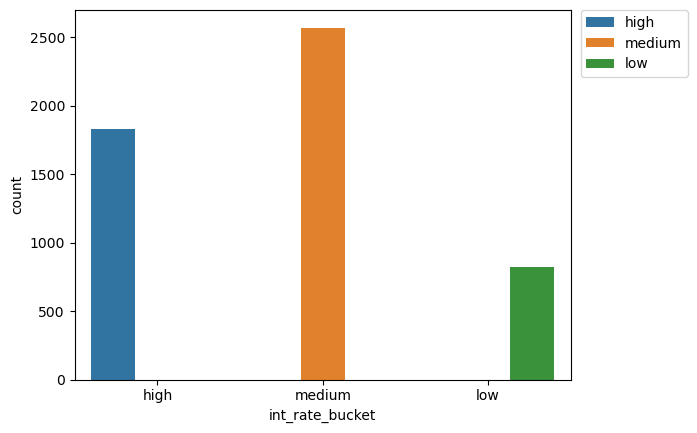

In [94]:
uni_var_analysis['int_rate_bucket'] = uni_var_analysis.int_rate.apply(lambda x : bucket_int_rate(x))
uni_var_analysis_defaults = uni_var_analysis[uni_var_analysis['has_paid']==0] 
uni_var_analysis_paid = uni_var_analysis[uni_var_analysis['has_paid']==1] 


barplot(uni_var_analysis_defaults, 'int_rate_bucket', 'loan_status')


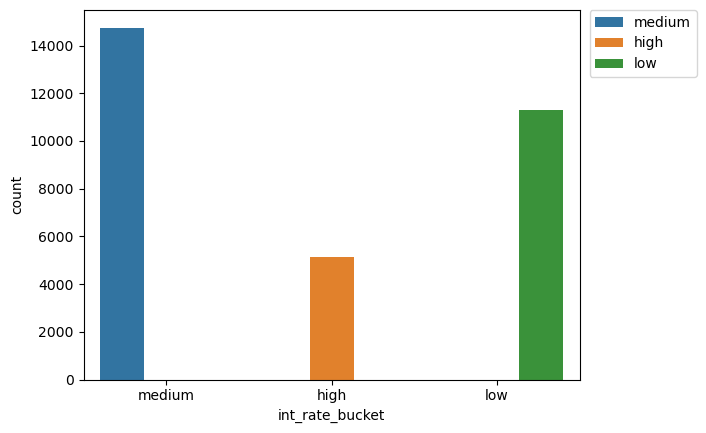

In [95]:
barplot(uni_var_analysis_paid, 'int_rate_bucket', 'loan_status')


### Observation, Higer the interest rates, Higher the rate of default

## Analyzing the Grade column

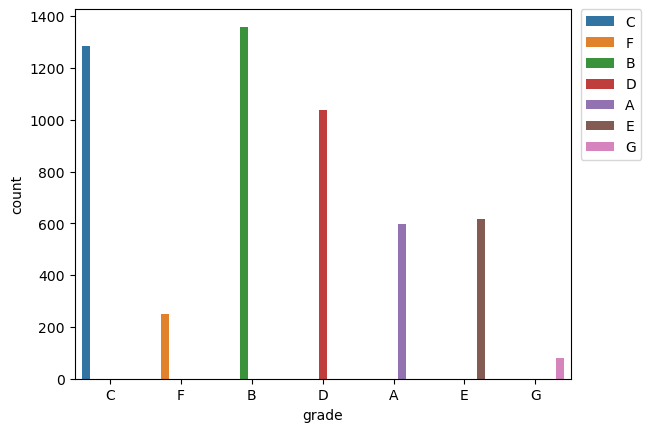

In [96]:
barplot(uni_var_analysis_defaults, 'grade', 'loan_status')


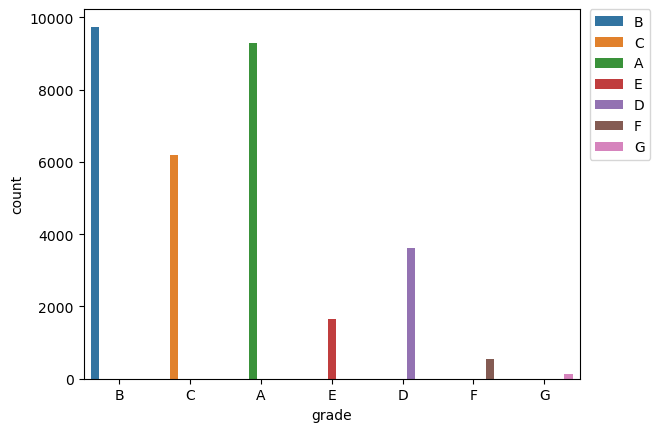

In [97]:
barplot(uni_var_analysis_paid, 'grade', 'loan_status')


### Higher the grade, Higher the risk of default

## Analyzing the Emloyment tenure column


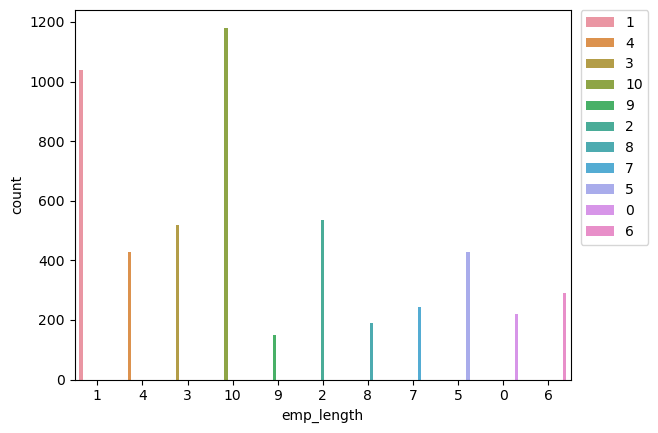

In [98]:
barplot(uni_var_analysis_defaults, 'emp_length', 'loan_status')


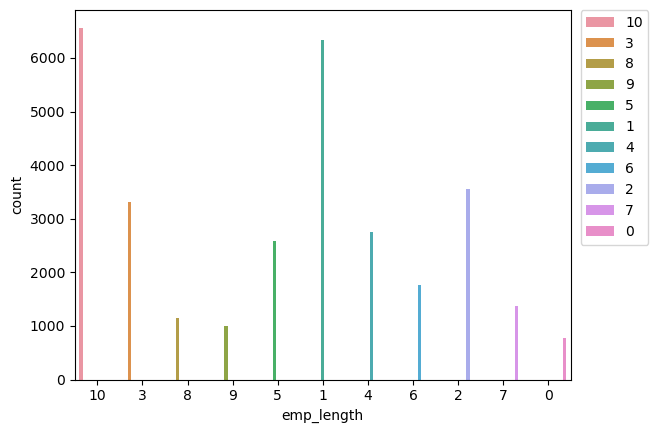

In [99]:
barplot(uni_var_analysis_paid, 'emp_length', 'loan_status')


### Observation,If employee with less than 2 years exp or more than 10 years of EXP are prone to default

## Analyzing home ownership column


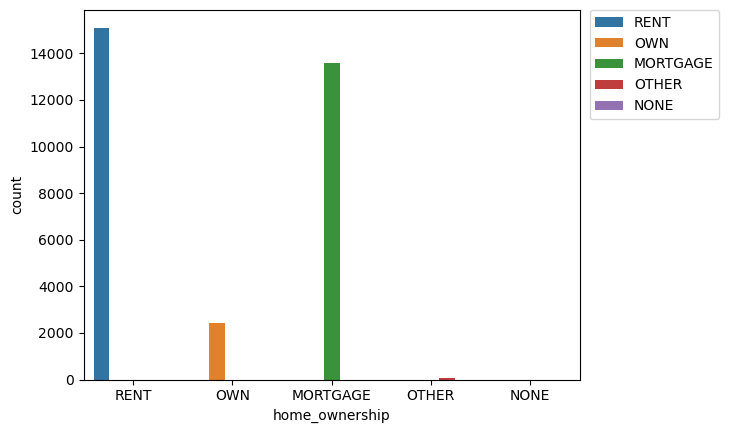

In [100]:
barplot(uni_var_analysis_paid, 'home_ownership', 'loan_status')


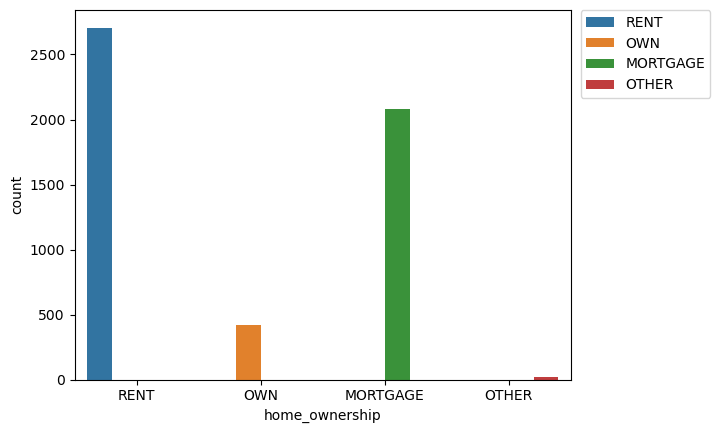

In [101]:
barplot(uni_var_analysis_defaults, 'home_ownership', 'loan_status')


### Observation, Rented and mortgage loans are prone to default

### Analyzing verification column


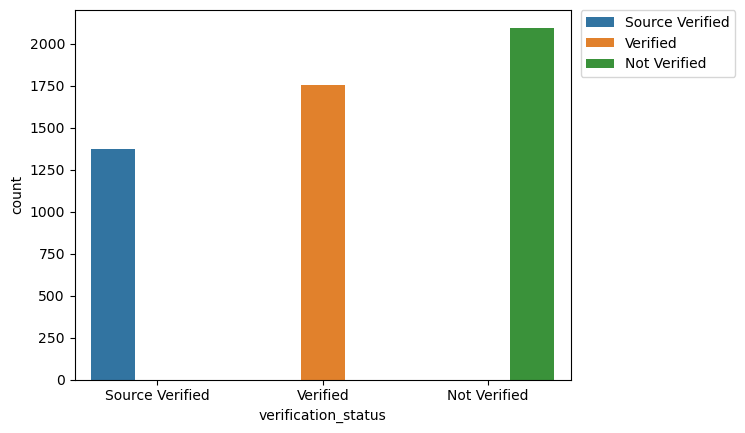

In [102]:
barplot(uni_var_analysis_defaults, 'verification_status', 'loan_status')


verification_status  loan_status
Not Verified         Fully Paid     14308
Verified             Fully Paid      8895
Source Verified      Fully Paid      7982
Not Verified         Charged Off     2096
Verified             Charged Off     1756
Source Verified      Charged Off     1373
dtype: int64

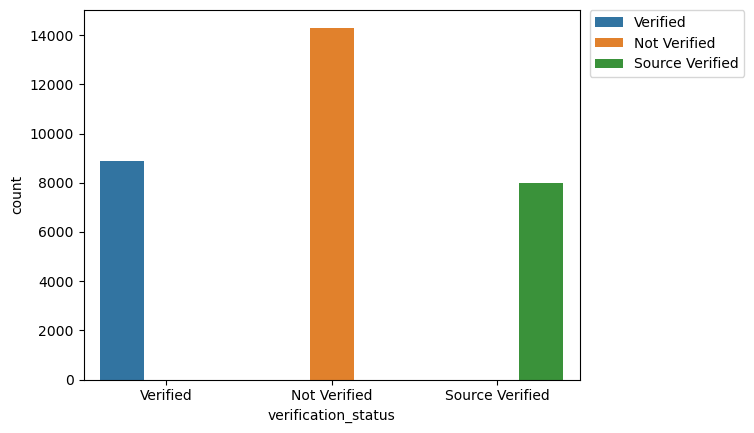

In [103]:
barplot(uni_var_analysis_paid, 'verification_status', 'loan_status')
uni_var_analysis[['verification_status', 'loan_status']].value_counts()

### Nothing can be inferred form verification_status

### Analyzing purpose column


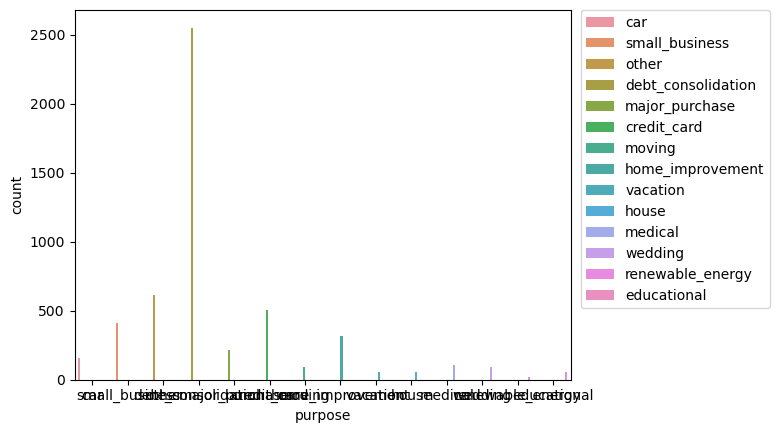

In [104]:
barplot(uni_var_analysis_defaults, 'purpose', 'loan_status')


## Debt consolidations purpose is prone to high default rates

### Analyzing year and Month column


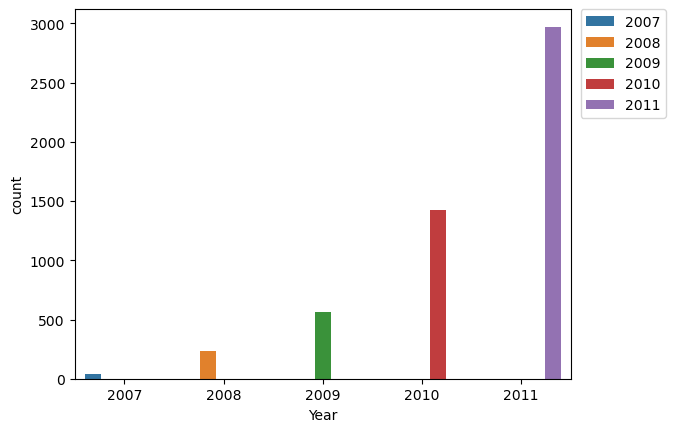

In [105]:
barplot(uni_var_analysis_defaults, 'Year', 'loan_status')


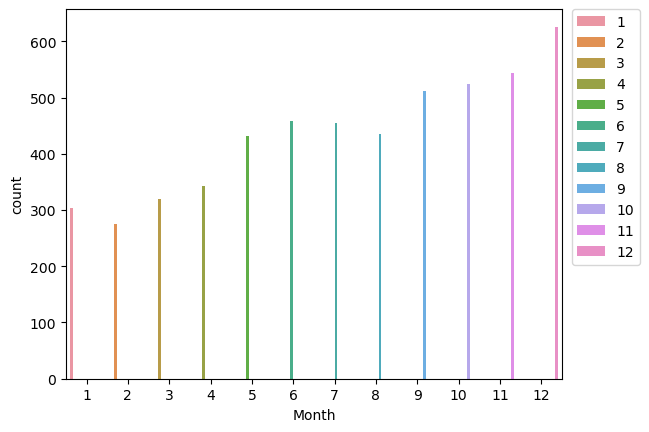

In [106]:
barplot(uni_var_analysis_defaults, 'Month', 'loan_status')


### Observation , in december, we have more defaults, yearly wise, default rate increases

## Analyze Annual Income columns

In [107]:
def bucket_annual_income(amount):
    if amount <= 54000:
        return 'low'
    elif amount > 54000 and amount <=75000:
        return 'medium'
    elif amount > 75000 and amount <=120000:
        return 'high'
    else:
        return 'very high'

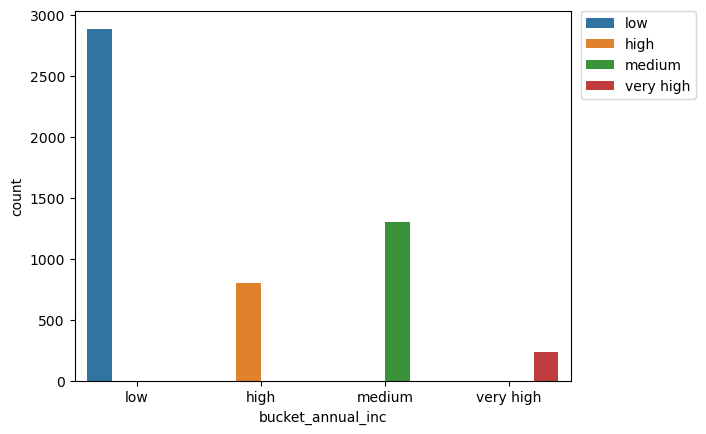

In [108]:
uni_var_analysis['bucket_annual_inc'] = uni_var_analysis['annual_inc'].apply(lambda x: bucket_annual_income(x))
uni_var_analysis_defaults = uni_var_analysis[uni_var_analysis['has_paid']==0] 
uni_var_analysis_paid = uni_var_analysis[uni_var_analysis['has_paid']==1] 
barplot(uni_var_analysis_defaults, 'bucket_annual_inc', 'loan_status')

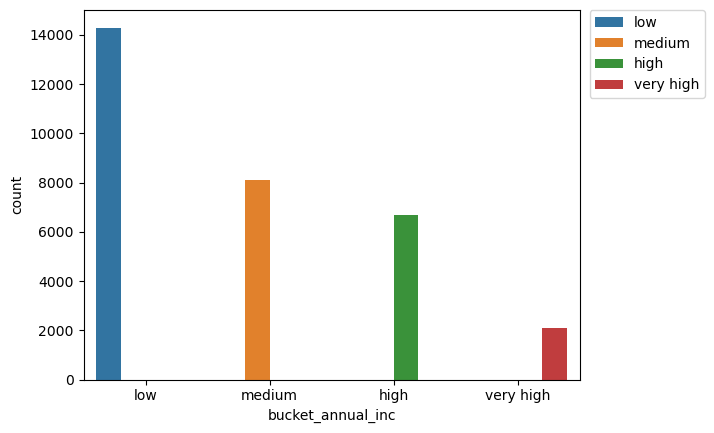

In [109]:
barplot(uni_var_analysis_paid, 'bucket_annual_inc', 'loan_status')

### Observation, Low income earners are likely to default

## Segmented Univariate Analysis with two dim columns

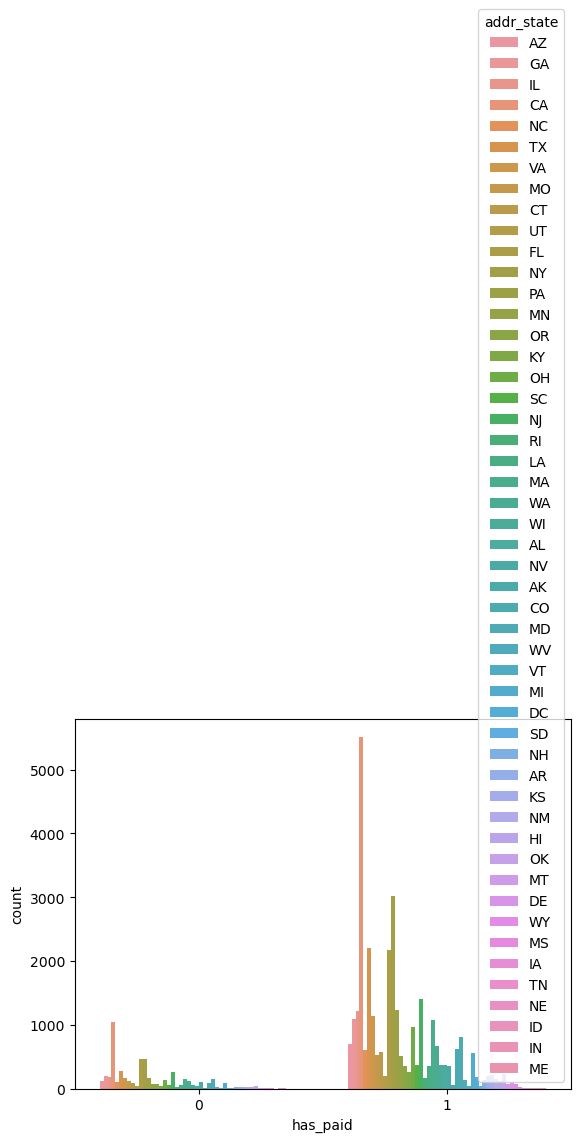

In [110]:
sns.countplot(data=uni_var_analysis, x='has_paid', hue="addr_state")
plt.show()


### Observation CA state has high default rates, MN and OR states as well

In [111]:
display(uni_var_analysis)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,Year,Month,has_paid,loan_amnt_bucket,installment_bucket,int_rate_bucket,bucket_annual_inc
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12,1,medium,very high,medium,low
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,2011,12,0,low,very high,high,low
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12,1,low,very high,high,low
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12,1,medium,very high,medium,low
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0,2011,12,1,medium,very high,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,CO,11.33,NaN,2007,7,1,low,very high,low,high
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,NC,6.40,NaN,2007,7,1,medium,very high,medium,low
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,1,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,MA,2.30,NaN,2007,7,1,medium,very high,low,high
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,1,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,MD,3.72,NaN,2007,7,1,medium,high,low,very high


<AxesSubplot:xlabel='loan_amnt_bucket', ylabel='count'>

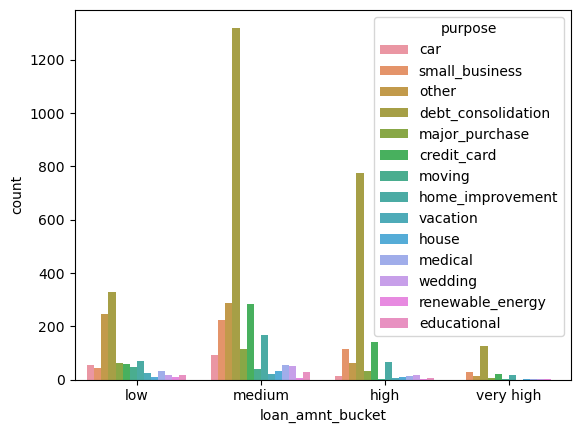

In [112]:
sns.countplot(data=uni_var_analysis_defaults, x='loan_amnt_bucket', hue="purpose")


<AxesSubplot:xlabel='bucket_annual_inc', ylabel='count'>

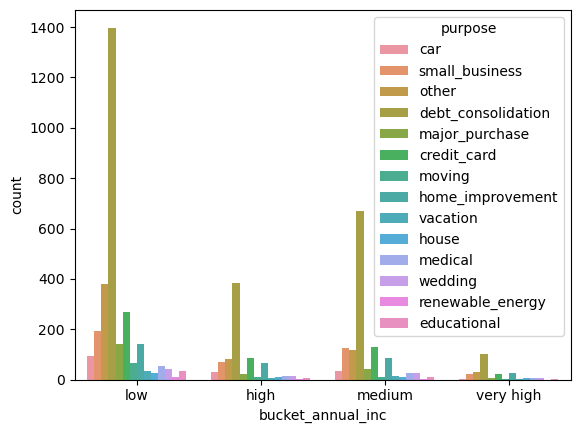

In [113]:
sns.countplot(data=uni_var_analysis_defaults, x='bucket_annual_inc', hue="purpose")


### Observation debt_conslidation has high default rates irrespective of income earned

<AxesSubplot:xlabel='Year', ylabel='count'>

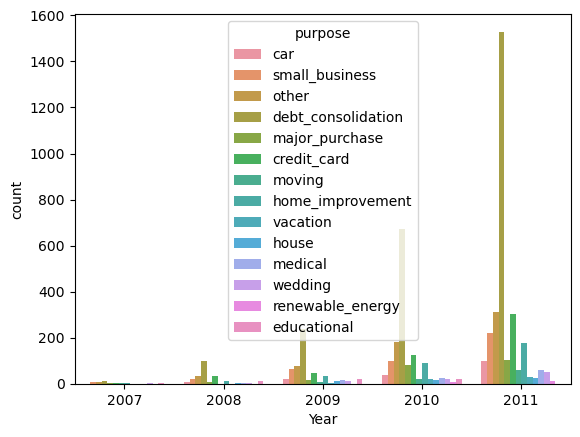

In [114]:
sns.countplot(data=uni_var_analysis_defaults, x='Year', hue="purpose")


### Observation Yearly default rates are increasing

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

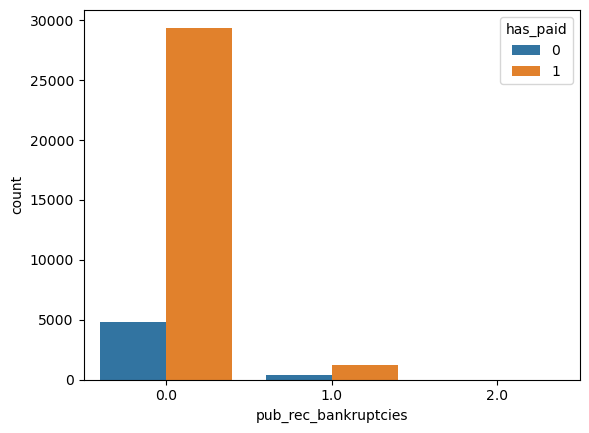

In [115]:
sns.countplot(data=uni_var_analysis, x='pub_rec_bankruptcies', hue="has_paid")


In [116]:
uni_var_analysis[['pub_rec_bankruptcies','has_paid']].value_counts()

pub_rec_bankruptcies  has_paid
0.0                   1           29393
                      0            4772
1.0                   1            1235
                      0             346
2.0                   1               3
                      0               2
dtype: int64

### Observation , pub_rec_bankruptcies is not inferential 

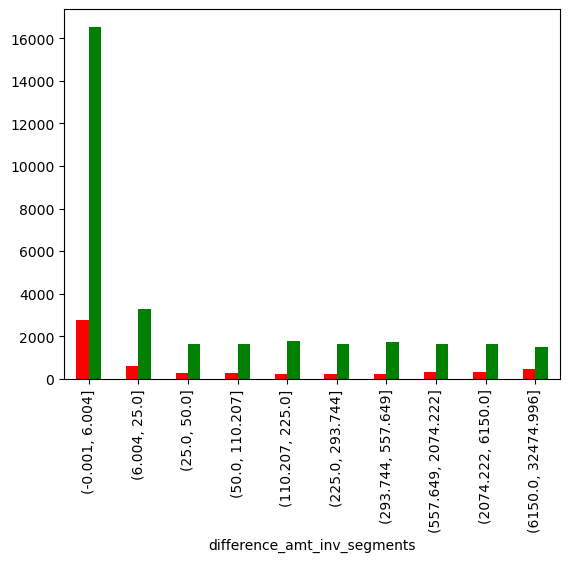

In [118]:
#Funded Amount segments
Cleansed_Data["difference_amt_inv"]=Cleansed_Data.loan_amnt - Cleansed_Data.funded_amnt_inv
Cleansed_Data["difference_amt_inv_segments"]=pd.qcut(Cleansed_Data['difference_amt_inv'],20,duplicates='drop')
Cleansed_Data.groupby(['difference_amt_inv_segments','has_paid']).has_paid.agg(['count']).unstack().plot(kind='bar', legend=False,color=['r','g'])
plt.show()

## Observation - When the difference in loan amount vs funded amount by investors is less than 6, they are less likely to default

# Corelations

<AxesSubplot:>

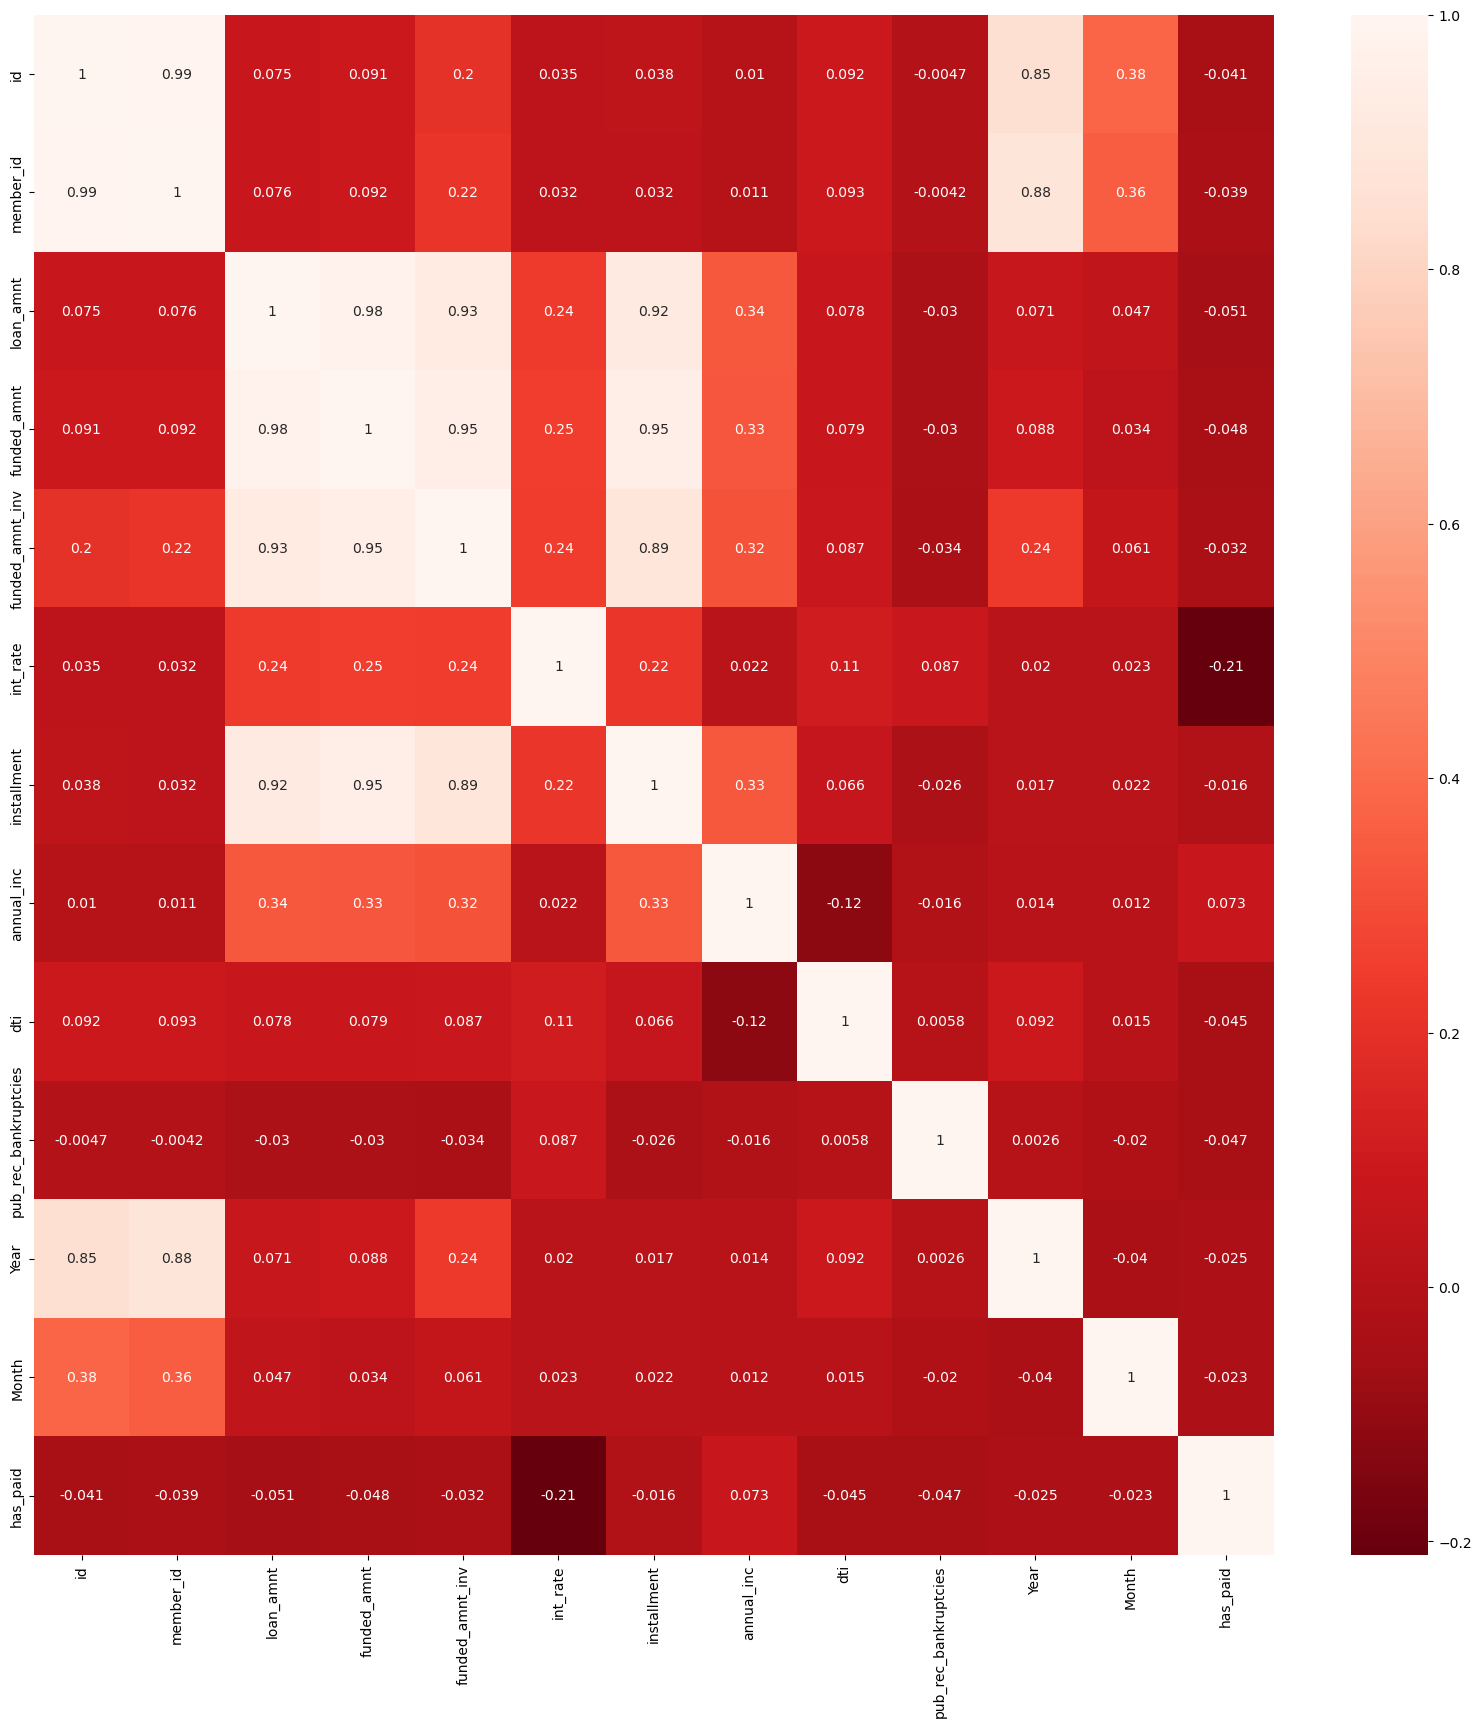

In [117]:
corelation = uni_var_analysis.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corelation, annot = True, cmap='Reds_r')

## Observations 
1) loan amount, funded amount , funded_amount_inv are deeply correlated \
2) Interest rate is negitively corelated to loan paid. 

# Summary

Higher the Grade , higher the defaults. \
Overall data says that most of them are repaying the loans.\
High interest leads to more defaults.\
CA addr_state has high default rates.
Observation 60 months tenure has high default rates. Almost 35% of the 60 month tenure loans are defaulted. \
People with less experiance (less than two years) Very high experience (10 + years) are prone to high defaults. \
People who are in Rents and Mortgauge Home_Ownership are prone to high defaults. \
More defaults are oversved in December months. Defaults are constantly increasing over the years. \
Low income earners are likely to default. \
debt_conslidation purpose has high default rates irresptive of income earned. \
loan amount, funded amount , funded_amount_inv are deeply correlated. \
Interest rate is negitively corelated to loan paid.\
Higher loan_amount are likely to be charged off. Low and Medium loan amounts are likely to be fully paid off. \
When the difference in loan amount vs funded amount by investors is less than 6, they are less likely to default